In [ ]:
# Import the necessary libraries
from bs4 import BeautifulSoup  # BeautifulSoup library for parsing HTML
import requests                # Requests library for making HTTP requests

# Define the URL of the webpage to scrape
url = "https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases"

#Send an HTTP GET request to the specified URL and store the response in the 'html' variable
html = requests.get(url)
type(html)

html

# Create a BeautifulSoup object to parse the HTML content of the webpage
soup = BeautifulSoup(html.text, 'html.parser')
download_links = soup.find_all('a', class_='ga-download')

# Extract the href attribute from each download link and store them in 'file_urls' list
file_urls = [link['href'] for link in download_links]


# Print each of the extracted file URLs
for url in file_urls:
    print(url)

https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv
https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv
https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv
http://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_iso3_regions.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com

In [ ]:
#Import the request module from urllib to make HTTP requests
from urllib import request

# Define the URL of the CSV data you want to download
csv_url = "http://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

# Initialize a count variable to keep track of downloaded files
count = 0

# Define a function 'download' to download CSV data from a given URL and save it to a file
def download(csv_url, count):
    # Open the URL and retrieve the data
    response = request.urlopen(csv_url)
    csv = response.read()
    csv_str = str(csv)

    # Split the CSV data into lines
    lines = csv_str.split('\\n')

    # Define the destination file path with a count variable
    destination = r'download{}.csv'.format(count)

    # Open the destination file for writing
    file = open(destination, "w")

    # Write each line of the CSV data to the destination file
    for line in lines:
        file.write(line + '\n')

    # Close the destination file
    file.close()

# Reset the count variable to 0
count = 0

# Iterate over a list (file_urls) which is not defined in the provided code, so this loop will not work as expected
for i in file_urls:
    count = count + 1
    # Call the 'download' function to download CSV data from the URL and save it to a file
    download(i, count)


All files are downloaded as download:1-9. The required files are renamed as dataframes when we read the CSV files.

In [ ]:
#Loading each file & assigning it to a dataframe with a new name.

import pandas as pd
import matplotlib.pyplot as plt

# Create an empty dictionary to store DataFrames
dataframes = {}

# Load and rename each file
dataframes_confirmed = pd.read_csv("download1.csv")
dataframes_deaths = pd.read_csv("download2.csv")
dataframes_recovered = pd.read_csv("download3.csv")

In [ ]:
dataframes_deaths

,b'Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23\r
0,NaN,Afghanistan,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,...,7896.0,7896.0,7896.0,7896.0,7896.0,7896.0,7896.0,7896.0,7896.0,7896\r
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,3598.0,3598.0,3598.0,3598.0,3598.0,3598.0,3598.0,3598.0,3598.0,3598\r
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,6881.0,6881.0,6881.0,6881.0,6881.0,6881.0,6881.0,6881.0,6881.0,6881\r
3,NaN,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165\r
4,NaN,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,1933.0,1933.0,1933.0,1933.0,1933.0,1933.0,1933.0,1933.0,1933.0,1933\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,Winter Olympics 2022,39.904200,116.407400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
286,NaN,Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,...,2159.0,2159.0,2159.0,2159.0,2159.0,2159.0,2159.0,2159.0,2159.0,2159\r
287,NaN,Zambia,-13.133897,27.849332,0.0,0.0,0.0,0.0,0.0,0.0,...,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057\r
288,NaN,Zimbabwe,-19.015438,29.154857,0.0,0.0,0.0,0.0,0.0,0.0,...,5663.0,5668.0,5668.0,5668.0,5668.0,5668.0,5668.0,5668.0,5671.0,5671\r


In [ ]:
dataframes_recovered

,b'Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23\r
0,NaN,Afghanistan,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
3,NaN,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
4,NaN,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Winter Olympics 2022,39.904200,116.407400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
271,NaN,Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
272,NaN,Zambia,-13.133897,27.849332,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r
273,NaN,Zimbabwe,-19.015438,29.154857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0\r


In [ ]:
dataframes_confirmed

,b'Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23\r
0,NaN,Afghanistan,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,...,209322.0,209340.0,209358.0,209362.0,209369.0,209390.0,209406.0,209436.0,209451.0,209451\r
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,...,334391.0,334408.0,334408.0,334427.0,334427.0,334427.0,334427.0,334427.0,334443.0,334457\r
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,...,271441.0,271448.0,271463.0,271469.0,271469.0,271477.0,271477.0,271490.0,271494.0,271496\r
3,NaN,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,...,47866.0,47875.0,47875.0,47875.0,47875.0,47875.0,47875.0,47875.0,47890.0,47890\r
4,NaN,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,...,105255.0,105277.0,105277.0,105277.0,105277.0,105277.0,105277.0,105277.0,105288.0,105288\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,Winter Olympics 2022,39.904200,116.407400,0.0,0.0,0.0,0.0,0.0,0.0,...,535.0,535.0,535.0,535.0,535.0,535.0,535.0,535.0,535.0,535\r
286,NaN,Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,...,11945.0,11945.0,11945.0,11945.0,11945.0,11945.0,11945.0,11945.0,11945.0,11945\r
287,NaN,Zambia,-13.133897,27.849332,0.0,0.0,0.0,0.0,0.0,0.0,...,343012.0,343012.0,343079.0,343079.0,343079.0,343135.0,343135.0,343135.0,343135.0,343135\r
288,NaN,Zimbabwe,-19.015438,29.154857,0.0,0.0,0.0,0.0,0.0,0.0,...,263921.0,264127.0,264127.0,264127.0,264127.0,264127.0,264127.0,264127.0,264276.0,264276\r


In [ ]:
#Loading each file & assigning it to a dataframe with a new name.

import pandas as pd
import matplotlib.pyplot as plt

# Create an empty dictionary to store DataFrames
dataframes = {}

# Load and rename each file
dataframes_confirmed = pd.read_csv("download1.csv")
dataframes_deaths = pd.read_csv("download2.csv")
dataframes_recovered = pd.read_csv("download3.csv")


# Data cleaning
df_confirmed=dataframes_confirmed.dropna()
df_confirmed = df_confirmed.iloc[:, :-1]

df_deaths=dataframes_deaths.dropna()
df_deaths = df_deaths.iloc[:, :-1]

df_recovered=dataframes_recovered.dropna()
df_recovered = df_recovered.iloc[:, :-1]


In [ ]:
# Define a list of DataFrames and corresponding labels
dataframes = [df_confirmed, df_deaths, df_recovered]
labels = ['Confirmed Cases', 'Deaths', 'Recovered Cases']
# Specify the range of countries to label
countries_to_label = ['India', 'China', 'US', 'Korea, South']  # Adjust as needed


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframes as shown in your code

# Define a list of DataFrames and corresponding labels
dataframes = [df_confirmed, df_deaths, df_recovered]
labels = ['Confirmed Cases', 'Deaths', 'Recovered Cases']

# Specify the range of countries to label (e.g., first 3 countries)
countries_to_label = ['India', 'China', 'US', 'Korea, South']  # Adjust as needed

# Statistical Summary
for df, label in zip(dataframes, labels):
    print(f"Statistical Summary for {label}:\n")
    print(df.describe())
    print("\n")

Statistical Summary for Confirmed Cases:

             Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  89.000000   89.000000   89.000000   89.000000   89.000000   89.000000   
mean   22.442517   24.950424    6.157303    7.247191   10.370787   15.831461   
std    28.980069   99.535149   47.070281   47.139368   58.537164   81.296348   
min   -51.796300 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%    12.178400  -63.416800    0.000000    0.000000    0.000000    0.000000   
50%    29.183200   45.166244    0.000000    0.000000    0.000000    0.000000   
75%    43.666100  115.722100    1.000000    2.000000    3.000000    7.000000   
max    71.706900  165.618042  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       2/27/23  \
count    89.000000    89.000000    89.000000    89.000000  ...  8.900000e+01   
mean     23.393258    32.415730    62.000000    68.505618  ...  2.359379e+05 

Confirmed case, Deaths and Recoveries across countries during the waves of covid-19

In [ ]:
import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart_confirmed = violin_plot(df_confirmed, *['1/22/20', 'Country/Region'], **{'inner': 'stick'})
chart_death = violin_plot(df_deaths, *['8/22/20', 'Country/Region'], **{'inner': 'stick'})
chart_recovered = violin_plot(df_recovered, *['8/31/20', 'Country/Region'], **{'inner': 'stick'})


In [ ]:
chart_confirmed

In [ ]:
chart_death

In [ ]:
chart_recovered

In [ ]:
chart_confirmed = violin_plot(df_confirmed, *['1/22/21', 'Country/Region'], **{'inner': 'stick'})
chart_death = violin_plot(df_deaths, *['1/22/21', 'Country/Region'], **{'inner': 'stick'})
chart_recovered = violin_plot(df_recovered, *['1/22/21', 'Country/Region'], **{'inner': 'stick'})

In [ ]:
chart_confirmed

In [ ]:
chart_death

In [ ]:
chart_recovered

In [ ]:
# Import necessary libraries
import numpy as np
from google.colab import autoviz  # Autoviz for visualization

# Define a function to create a categorical histogram
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    from matplotlib import pyplot as plt  # Import Matplotlib for plotting
    import seaborn as sns  # Import Seaborn for better visualization

    # Group the DataFrame by the specified column and plot a horizontal bar chart
    df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))

    # Remove top and right spines from the plot
    plt.gca().spines[['top', 'right',]].set_visible(False)

    # Set the title for the plot
    plt.title('Scaled/Normalized Total Cases')

    # Return the Matplotlib chart as an Autoviz MplChart object
    return autoviz.MplChart.from_current_mpl_state()

# Call the categorical_histogram function with specified parameters
chart = categorical_histogram(df_recovered, *['Country/Region'], **{})
chart

In [ ]:
# Generating Correlation Matrix

count = 0  # Initialize a counter for file naming

# Loop through a list of dataframes and their corresponding labels
for df, label in zip(dataframes, labels):
    count += 1

    # Calculate the correlation matrix for the current dataframe
    corr_matrix = df.corr()

    # Print the correlation matrix to the console
    print(corr_matrix)

    # Specify the file path where you want to save the CSV file, using the current count
    file_path = "correlation_matrix{}.csv".format(count)

    # Export the correlation matrix to a CSV file at the specified file path, without including the row indices
    corr_matrix.to_csv(file_path, index=False)

    print(f"Correlation matrix exported to {file_path}")


<ipython-input-20-cd4bf09112ce>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


              Lat      Long   1/22/20   1/23/20   1/24/20   1/25/20   1/26/20  \
Lat      1.000000 -0.187389  0.038333  0.045530  0.051728  0.058401  0.061678   
Long    -0.187389  1.000000  0.116617  0.136657  0.157510  0.173697  0.184680   
1/22/20  0.038333  0.116617  1.000000  0.998569  0.994655  0.991661  0.987738   
1/23/20  0.045530  0.136657  0.998569  1.000000  0.998144  0.995819  0.992947   
1/24/20  0.051728  0.157510  0.994655  0.998144  1.000000  0.998470  0.996650   
...           ...       ...       ...       ...       ...       ...       ...   
3/4/23  -0.315513  0.191191 -0.034175 -0.038496 -0.046397 -0.051527 -0.053176   
3/5/23  -0.315505  0.191184 -0.034175 -0.038497 -0.046397 -0.051527 -0.053177   
3/6/23  -0.315476  0.191153 -0.034179 -0.038501 -0.046402 -0.051533 -0.053183   
3/7/23  -0.315455  0.191135 -0.034180 -0.038502 -0.046403 -0.051534 -0.053184   
3/8/23  -0.315437  0.191114 -0.034182 -0.038505 -0.046406 -0.051537 -0.053188   

          1/27/20   1/28/20

<ipython-input-20-cd4bf09112ce>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


              Lat      Long   1/22/20   1/23/20   1/24/20   1/25/20   1/26/20  \
Lat      1.000000 -0.187389  0.031566  0.035251  0.038091  0.035497  0.036319   
Long    -0.187389  1.000000  0.094048  0.099719  0.102675  0.099267  0.101945   
1/22/20  0.031566  0.094048  1.000000  0.998272  0.998285  0.999382  0.999285   
1/23/20  0.035251  0.099719  0.998272  1.000000  0.998979  0.999107  0.998650   
1/24/20  0.038091  0.102675  0.998285  0.998979  1.000000  0.999726  0.999118   
...           ...       ...       ...       ...       ...       ...       ...   
3/4/23   0.047442 -0.073920  0.117186  0.114912  0.114065  0.115360  0.114793   
3/5/23   0.047441 -0.073916  0.117184  0.114910  0.114063  0.115358  0.114791   
3/6/23   0.047565 -0.074046  0.117165  0.114890  0.114043  0.115339  0.114771   
3/7/23   0.047603 -0.074075  0.117132  0.114858  0.114011  0.115306  0.114739   
3/8/23   0.047702 -0.074189  0.117088  0.114814  0.113967  0.115262  0.114695   

          1/27/20   1/28/20

<ipython-input-20-cd4bf09112ce>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


              Lat      Long   1/22/20   1/23/20   1/24/20   1/25/20   1/26/20  \
Lat      1.000000  0.047738  0.057656  0.059376  0.065830  0.070591  0.067579   
Long     0.047738  1.000000  0.082585  0.088448  0.096725  0.101794  0.097317   
1/22/20  0.057656  0.082585  1.000000  0.997454  0.996492  0.994896  0.997032   
1/23/20  0.059376  0.088448  0.997454  1.000000  0.998453  0.996656  0.997769   
1/24/20  0.065830  0.096725  0.996492  0.998453  1.000000  0.999065  0.999378   
...           ...       ...       ...       ...       ...       ...       ...   
3/4/23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3/5/23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3/6/23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3/7/23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3/8/23        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          1/27/20   1/28/20

Trend Analysis consistent with dates:  
Confirmed vs Death vs Recovery (For 3 dates)

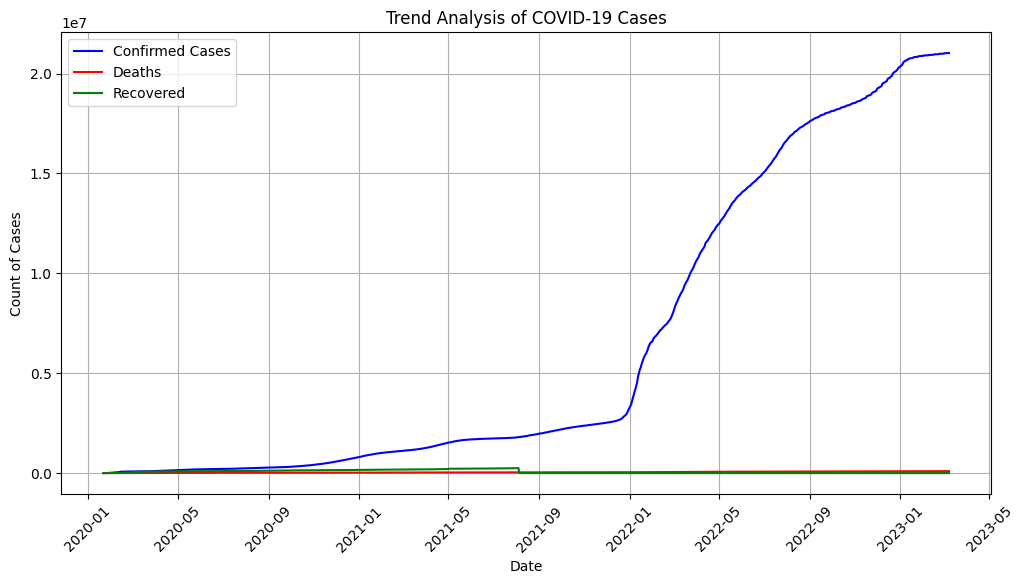

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataframes: df_confirmed, df_deaths, and df_recovered

# Select columns with dates and values (starting from the 4th column)
confirmed_data = df_confirmed.iloc[:, 4:]
deaths_data = df_deaths.iloc[:, 4:]
recovered_data = df_recovered.iloc[:, 4:]

# Dates (assuming the dates are in the first column of each DataFrame)
dates = pd.to_datetime(df_confirmed.columns[4:], format='%m/%d/%y')

# Plotting trend analysis for confirmed cases, deaths, and recoveries on a common graph
plt.figure(figsize=(12, 6))
plt.plot(dates, confirmed_data.sum(axis=0), label='Confirmed Cases', color='blue')
plt.plot(dates, deaths_data.sum(axis=0), label='Deaths', color='red')
plt.plot(dates, recovered_data.sum(axis=0), label='Recovered', color='green')

plt.xlabel('Date')
plt.ylabel('Count of Cases')
plt.title('Trend Analysis of COVID-19 Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Correlation Heatmap between Dataframes (Grouped by Countries)

<ipython-input-22-b1026357af13>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = df_deaths.groupby('Country/Region').sum().reset_index()
<ipython-input-22-b1026357af13>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df2 = df_recovered.groupby('Country/Region').sum().reset_index()
<ipython-input-22-b1026357af13>:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1_common = df1[common_columns]
<ipython-input-22-b1026357af13>:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

{'6/23/20', '8/5/22', '8/24/22', '5/25/22', '10/13/21', '7/7/20', '3/6/21', '10/12/22', '8/26/21', '8/11/22', '3/28/21', '12/11/21', '9/21/20', '10/17/21', '2/2/20', '6/2/20', '4/17/20', '12/7/20', '8/9/21', '4/27/20', '10/16/20', '1/8/23', '11/30/21', '2/3/20', '12/21/21', '4/13/22', '12/30/20', '4/30/22', '4/20/22', '5/5/22', '7/11/22', '2/25/20', '6/18/21', '12/4/20', '5/8/21', '5/12/20', '11/16/22', '1/9/23', '7/5/20', '11/5/21', '2/25/21', '11/9/22', '5/23/20', '1/28/22', '8/20/21', '2/26/21', '12/8/21', '4/14/22', '8/7/20', '11/14/22', '4/12/20', '6/8/22', '10/8/20', '4/14/20', '2/29/20', '3/1/21', '4/9/21', '9/10/20', '1/24/21', '11/19/20', '3/7/20', '9/22/22', '10/5/22', '7/24/21', '12/24/22', '2/7/23', '3/7/23', '9/11/22', '3/5/20', '2/8/20', '9/10/21', '2/27/22', '1/19/23', '6/7/21', '3/28/22', '4/15/21', '9/3/22', '3/16/22', '5/13/22', '4/27/22', '5/20/20', '11/24/21', '9/12/21', '8/22/21', '11/24/20', '9/25/21', '2/12/22', '2/2/22', '8/10/21', '4/1/21', '6/23/21', '9/30/22'

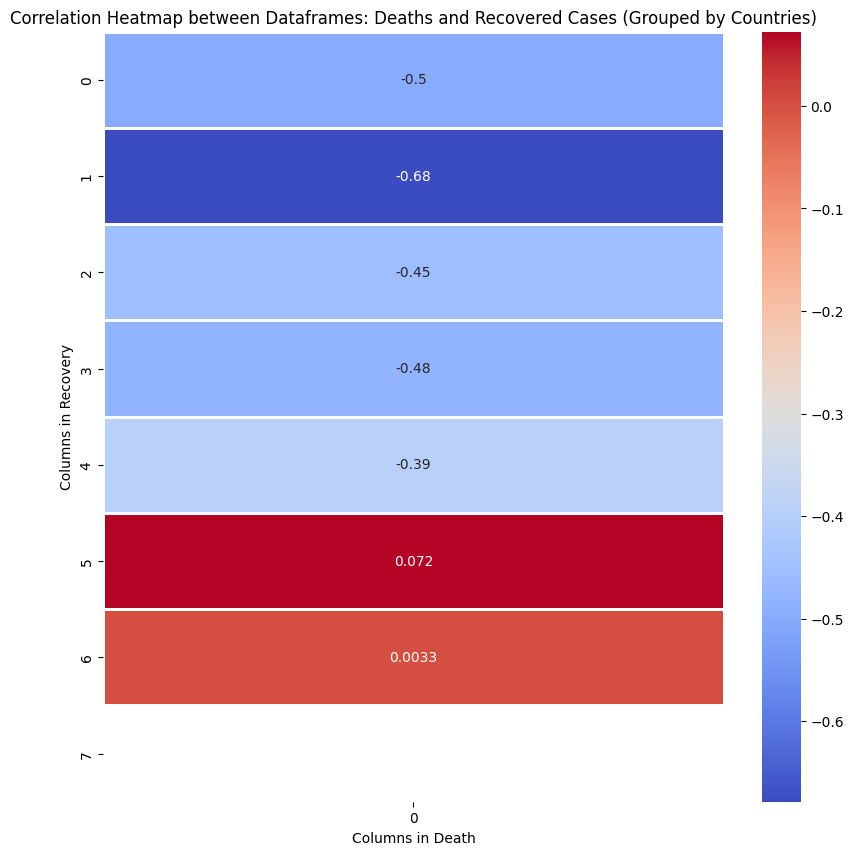

In [ ]:
# Correlation between Deaths and Recovered Cases

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_correlation(df1, df2):
    """
    Find the correlation between two DataFrames.

    Parameters:
    - df1, df2: pandas DataFrames
        The two DataFrames for which you want to find the correlation.

    Returns:
    - correlation_matrix: pandas DataFrame
        A DataFrame containing the correlation values for columns with the same names.
    """

    # Get the common column names between the two DataFrames
    common_columns = set(df1.columns).intersection(df2.columns)
    print(common_columns)
    # Create DataFrames with only the common columns
    df1_common = df1[common_columns]
    df2_common = df2[common_columns]

    # Calculate the correlation matrix between the common columns
    correlation_matrix = df1_common.corrwith(df2_common, axis=1)

    return correlation_matrix

# Example usage:
# Assuming df1 and df2 are your DataFrames
grouped_df1 = df_deaths.groupby('Country/Region').sum().reset_index()
grouped_df2 = df_recovered.groupby('Country/Region').sum().reset_index()
# correlation_result = find_correlation(df_deaths, df_recovered)

correlation_result = find_correlation(grouped_df1, grouped_df2)
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_result.to_frame(), annot=True, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Columns in Death')
plt.ylabel('Columns in Recovery')
plt.title('Correlation Heatmap between Dataframes: Deaths and Recovered Cases (Grouped by Countries)')

# Show the plot
plt.show()



<ipython-input-23-8d7e7e8e5b21>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = df_recovered.groupby('Country/Region').sum().reset_index()
<ipython-input-23-8d7e7e8e5b21>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df2 = df_confirmed.groupby('Country/Region').sum().reset_index()
<ipython-input-22-b1026357af13>:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1_common = df1[common_columns]
<ipython-input-22-b1026357af13>:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future vers

{'6/23/20', '8/5/22', '8/24/22', '5/25/22', '10/13/21', '7/7/20', '3/6/21', '10/12/22', '8/26/21', '8/11/22', '3/28/21', '12/11/21', '9/21/20', '10/17/21', '2/2/20', '6/2/20', '4/17/20', '12/7/20', '8/9/21', '4/27/20', '10/16/20', '1/8/23', '11/30/21', '2/3/20', '12/21/21', '4/13/22', '12/30/20', '4/30/22', '4/20/22', '5/5/22', '7/11/22', '2/25/20', '6/18/21', '12/4/20', '5/8/21', '5/12/20', '11/16/22', '1/9/23', '7/5/20', '11/5/21', '2/25/21', '11/9/22', '5/23/20', '1/28/22', '8/20/21', '2/26/21', '12/8/21', '4/14/22', '8/7/20', '11/14/22', '4/12/20', '6/8/22', '10/8/20', '4/14/20', '2/29/20', '3/1/21', '4/9/21', '9/10/20', '1/24/21', '11/19/20', '3/7/20', '9/22/22', '10/5/22', '7/24/21', '12/24/22', '2/7/23', '3/7/23', '9/11/22', '3/5/20', '2/8/20', '9/10/21', '2/27/22', '1/19/23', '6/7/21', '3/28/22', '4/15/21', '9/3/22', '3/16/22', '5/13/22', '4/27/22', '5/20/20', '11/24/21', '9/12/21', '8/22/21', '11/24/20', '9/25/21', '2/12/22', '2/2/22', '8/10/21', '4/1/21', '6/23/21', '9/30/22'

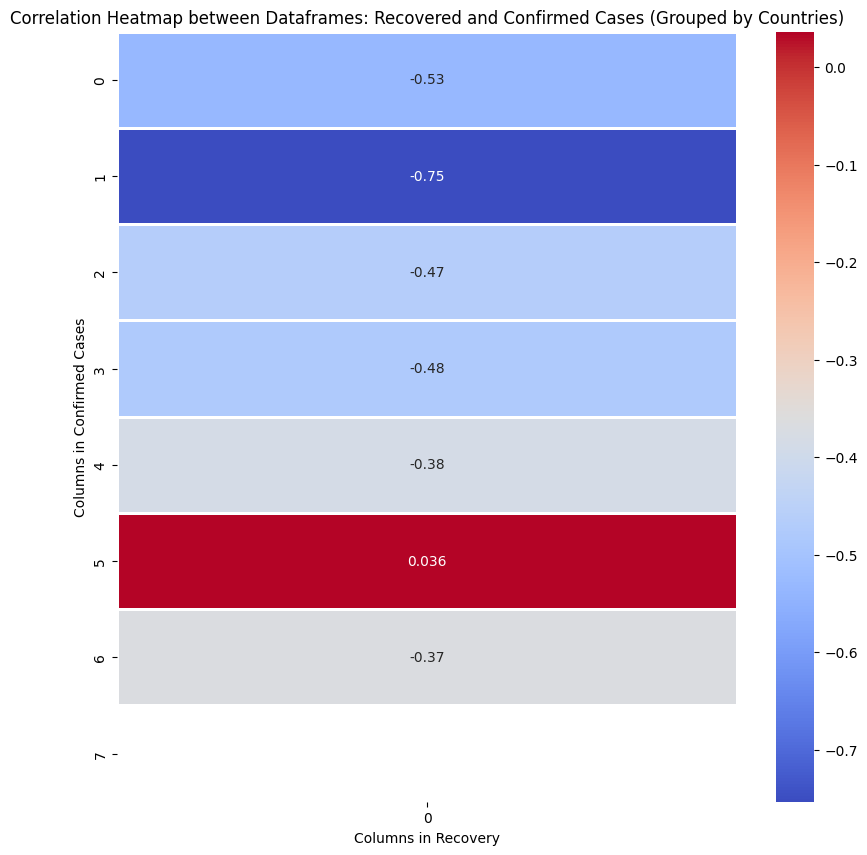

In [ ]:
# Correlation between Recovered and Confirmed Cases

grouped_df1 = df_recovered.groupby('Country/Region').sum().reset_index()
grouped_df2 = df_confirmed.groupby('Country/Region').sum().reset_index()
# correlation_result = find_correlation(df_deaths, df_recovered)

correlation_result = find_correlation(grouped_df1, grouped_df2)
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_result.to_frame(), annot=True, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Columns in Recovery')
plt.ylabel('Columns in Confirmed Cases')
plt.title('Correlation Heatmap between Dataframes: Recovered and Confirmed Cases (Grouped by Countries)')

# Show the plot
plt.show()


Review Analysis

<ipython-input-24-437f9d8ec7f4>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = df_recovered.groupby('Country/Region').sum().reset_index()
<ipython-input-24-437f9d8ec7f4>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df2 = df_deaths.groupby('Country/Region').sum().reset_index()
<ipython-input-24-437f9d8ec7f4>:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1_common = df1[common_columns]
<ipython-input-24-437f9d8ec7f4>:22: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future versi

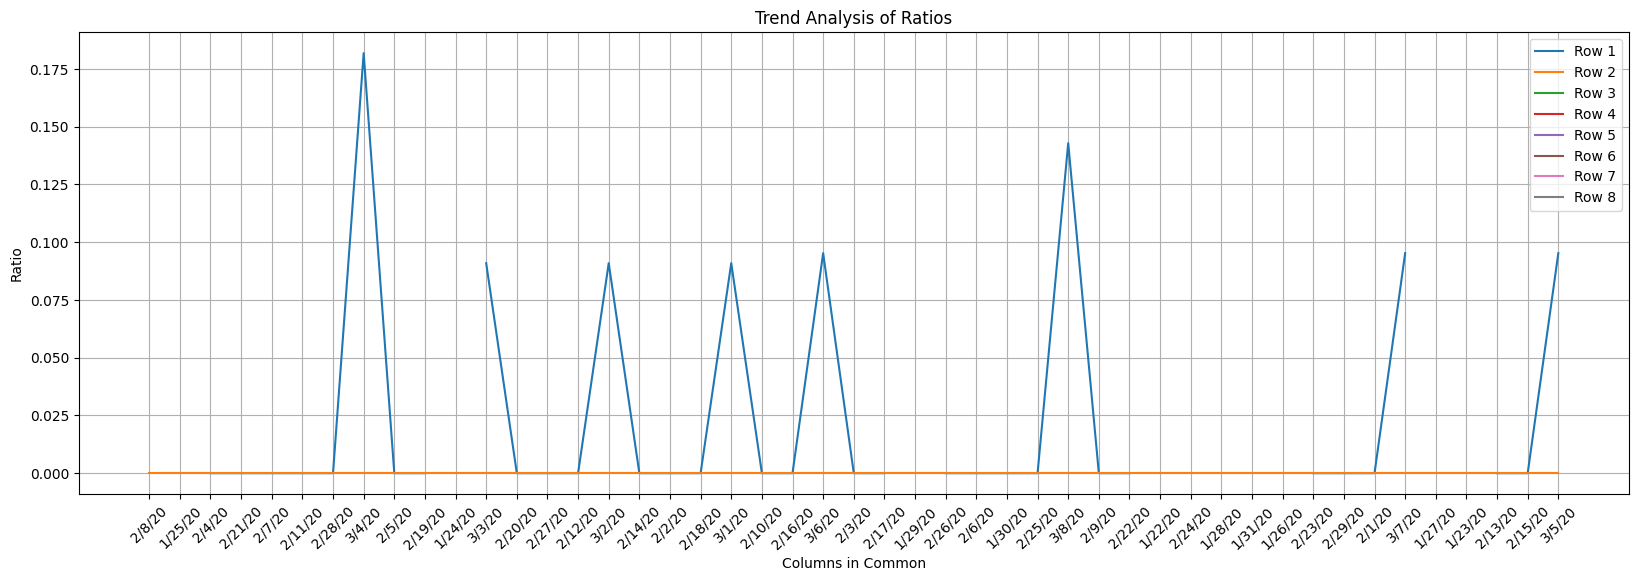

In [ ]:
import pandas as pd
import numpy as np

def calculate_ratio(df2, df1):
    """
    Calculate the ratio of corresponding row values in common columns between two DataFrames.

    Parameters:
    - df1, df2: pandas DataFrames
        The two DataFrames for which you want to calculate the ratio.

    Returns:
    - ratio_df: pandas DataFrame
        A DataFrame containing the ratios of corresponding row values.
    """

    # Get the common column names between the two DataFrames
    common_columns = set(df1.columns).intersection(df2.columns)

    # Create DataFrames with only the common columns
    df1_common = df1[common_columns]
    df2_common = df2[common_columns]

    # Convert columns to numeric (non-numeric values will be NaN)
    df1_common = df1_common.apply(pd.to_numeric, errors='coerce')
    df2_common = df2_common.apply(pd.to_numeric, errors='coerce')

    # Calculate the ratio of row values
    ratio_df = df1_common /df2_common

    return ratio_df

# Group DataFrames by 'Country' column
grouped_df1 = df_recovered.groupby('Country/Region').sum().reset_index()
grouped_df2 = df_deaths.groupby('Country/Region').sum().reset_index()
grouped_df1 = grouped_df1.iloc[:, 3:50]
grouped_df2 = grouped_df2.iloc[:, 3:50]

# Calculate the ratio of row values in common columns
ratio_df = calculate_ratio(grouped_df1, grouped_df2)

# Plot the trendline for each row
plt.figure(figsize=(20, 6))
for index, row in ratio_df.iterrows():
    plt.plot(row.index, row.values, label=f'Row {index + 1}')

plt.xlabel('Columns in Common')
plt.ylabel('Ratio')
plt.title('Trend Analysis of Ratios')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
